# Analiza i Bazy Danych
## Karol Musiał, grupa 3a
### Laboratorium 7
## "Modele Liniowe"

In [1]:
# Import Modułów
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import numpy as np

### Funkcja do Zadania 1

In [2]:
def linear_reg(name, X_name, y_name):
    
    # Odczytanie danych
    data = pd.read_csv(name)
    DF = pd.DataFrame(data)

    # Wstępny wykres
    DF.plot.scatter(x=X_name,y=y_name,marker='o')
    plt.suptitle('Wykres wstepny')
    plt.show()

    # Dzielenie na podzbiory
    X = DF[X_name]
    y = DF[y_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, train_size=0.3)
    X_train = np.array(X_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)

    # Tworzenie modelu
    model1 = LinearRegression()
    model1.fit(X_train, y_train)

    # Wypisywanie wskaznikow
    print("\nCoef = {a}".format(a=model1.coef_))
    print("Intercept = {a}\n".format(a=model1.intercept_))
    # Coef to współczynniki wielomianu opisującego zmienne zależne i niezależne
    # Intercept to wartości zmiennych niezależnych dla zmiennych zależnych równych 0
    # W interpretacji geometrycznej, coef to nachylenie prostej, a intercept to miejsce przecięcia z osią Y

    # Predykcja czesci testowej
    y_pred = model1.predict(X_test)
    print("Roznica miedzy predykcja a rzeczywistym wynikiem : \n{a}\n".format(a=(y_pred - y_test).T))

    # Wykresy
    plt.scatter(X_test, y_test, label='y_test')
    plt.plot(X_test, y_pred, 'r', label='y_pred')
    plt.legend()
    plt.suptitle('Regresja liniowa')
    plt.show()

    # Walidacja danych
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('\nŚredni błąd bezwzględny = {a}'.format(a=mae))
    print('Błąd średniokwadratowy = {a}'.format(a=mse))
    print('Pierwiastek błędu średniokwadratowego = {a}'.format(a=rmse))

<b> Coef to współczynniki wielomianu opisującego zmienne zależne i niezależne. Intercept to wartości zmiennych niezależnych dla zmiennych zależnych równych 0W interpretacji geometrycznej, coef to nachylenie prostej, a intercept to miejsce przecięcia z osią Y.<\b>
<b> Podążając za nazewnictwem z polecenia, Intercept to $\beta$0, a Coef to $\beta$1-n<b>

### Zadanie 1 - Scores

In [3]:
data = pd.read_csv('SCORES.csv')
DF = pd.DataFrame(data) 
DF.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


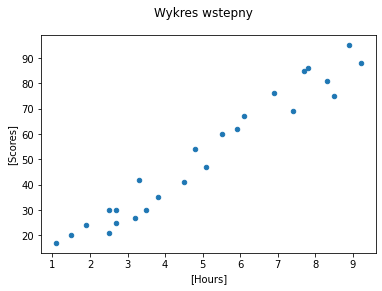


Coef = [[9.69327999]]
Intercept = [4.38371891]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[[ 8.40221488  8.31019888 -3.08853714 11.77659883 -3.48727315  7.61691888
  -1.07636111 -2.30324114  6.81944686  5.55557488 -5.62845712 -5.97802516
   6.21818287  7.11399084 -4.34608917 -1.38308112 -1.19904911  3.83794283]]



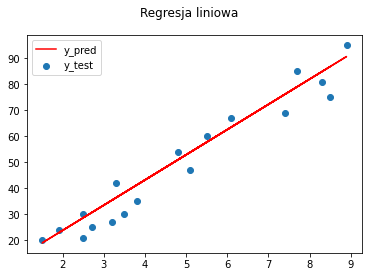


Średni błąd bezwzględny = 5.230065776334694
Błąd średniokwadratowy = 35.3086187024475
Pierwiastek błędu średniokwadratowego = 5.942105578197639


In [4]:
linear_reg('SCORES.csv', ['Hours'], ['Scores'])

<b> Dla powyższego modelu, gdzie zmienne są rozłożone względnie liniowo, regresja liniowa zwraca zadowalające wyniki. Walidacja danych wykazała, iż wielkość błędów jest akceptowalna.<b>

### Zadanie 1 - SBP

In [5]:
data = pd.read_csv('SBP.csv')
DF = pd.DataFrame(data) 
DF.head()

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132


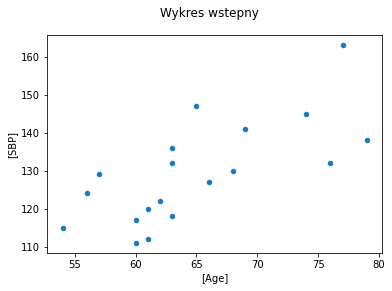


Coef = [[0.12258065]]
Intercept = [126.74193548]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[[ 14.21935484  16.46451613  -9.18709677  23.09677419  22.21935484
   17.09677419   7.83225806  -5.8         12.34193548   9.60645161
   -1.53548387   2.46451613  18.36129032 -26.81935484]]



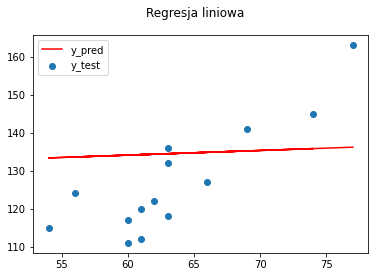


Średni błąd bezwzględny = 13.360368663594468
Błąd średniokwadratowy = 234.39795451166933
Pierwiastek błędu średniokwadratowego = 15.310060565251508


In [6]:
linear_reg('SBP.csv', ['Age'], ['SBP'])

<b> W tym przypadku, dane były bardziej rozrzucone, dodatkowo uwzględniając ograniczony zbiór uczący, nie jest zaskakującym fakt, że regresja liniowa aproksymuje dane z większymi niż poprzednio błędami. Wynika to z faktu, iż tych danych nie da się przybliżyć za pomocą funkcji liniowej.<b>

### Funkcja do Zadania 2

In [7]:
def multiple_linear_reg(name, X_name, y_name):
    
    # Odczytanie danych
    data = pd.read_csv(name)
    DF = pd.DataFrame(data)
    
    # Dzielenie na podzbiory
    X = DF[X_name]
    y = DF[y_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, train_size=0.3, random_state=0)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    # Tworzenie modelu
    model2 = LinearRegression()
    model2.fit(X_train, y_train)
    
    # Wypisywanie wskaznikow
    print("\nCoef = {a}".format(a=model2.coef_))
    print("Intercept = {a}\n".format(a=model2.intercept_))
    
    # Predykcja czesci testowej
    y_pred = model2.predict(X_test)
    print("Roznica miedzy predykcja a rzeczywistym wynikiem : \n{a}\n".format(a=(y_pred - y_test).T))
    
    # Walidacja danych
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('\nŚredni błąd bezwzględny = {a}'.format(a=mae))
    print('Błąd średniokwadratowy = {a}'.format(a=mse))
    print('Pierwiastek błędu średniokwadratowego = {a}'.format(a=rmse))

### Zadanie 2

In [8]:
data = pd.read_csv('PETROL.csv')
DF = pd.DataFrame(data) 
DF.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [9]:
multiple_linear_reg('PETROL.csv', ['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy'], ['Zuzycie_paliwa'])


Coef = [[-4.25828099e+01 -9.64961393e-02 -3.99171321e-03  1.64357272e+03]]
Intercept = [416.46906213]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[[-56.53894144 133.70319583  45.21448396  19.95133347 127.18200174
  -24.00953873  34.83707906 112.4370323   14.52880253 -80.52120946
  -62.29198939  59.59920747  27.74487434  10.43352587  47.25948598
   46.20751342 101.48961601 -35.35073673 -11.42163915  -0.8382952
  -73.22786833  15.68872903 -23.97602992  84.60025504  48.02046464
   17.90129456  73.91179262 -16.67947407 -48.68234524 -85.71483082
  127.93200902 101.09194119 132.37155398  49.4955237 ]]


Średni błąd bezwzględny = 57.37807688987879
Błąd średniokwadratowy = 4798.872014755156
Pierwiastek błędu średniokwadratowego = 69.27389129213947


<b> W tym zadaniu zaimplementowano regresje multi liniową. W przeciwieństwie do poprzednich modeli, tutaj Coef jest wektorem 4 elementowym, taka sytuacja ma miejsce, ponieważ zmienna y zależy od 4 predyktorów. </b>
<b> Badając wartości błędów, można dojść do wniosku, że ten model nie spełnił swojego zadania i wyniki nie są zadowalające. Duża wartość różnicy między wynikami predykcji, a wynikami rzeczywistymi, może być powiązana ze względnie małą iloścą danych do uczenia, oznacza to, że kluczowy jest element losowości co znacząco utrudnia budowę modelu dobrze obrazującego zależność danych. Kolejnym powodem mogą być omówione wczesniej ograniczenia wynikające z próby przybliżania nieliniowych danych przy pomocy funkcji liniowej. <b>

### Zadanie 3

In [10]:
# Import Danych
data = pd.read_csv('HEART.csv')
DF = pd.DataFrame(data)
DF.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


### Przetworzone dane

In [11]:
# Przetworzenie danych
DF = DF.replace('?', np.nan)
del DF['slope']
del DF['ca']
del DF['thal']
DF = DF.dropna()
DF.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0


### Dane po przekodowaniu

In [12]:
# Kodowanie niezależnych zmiennych kategorialnych
DF = pd.get_dummies(DF, columns=['cp', 'restecg'], drop_first=True)
DF

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_2,cp_3,cp_4,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,1,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,1,0,0,0,0
3,30,0,170,237,0,170,0,0.0,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,1,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,0,0,1,0,0
290,54,0,130,294,0,100,1,0.0,1,0,1,0,1,0
291,56,1,155,342,1,150,1,3.0,1,0,0,1,0,0
292,58,0,180,393,0,110,1,1.0,1,1,0,0,0,0


In [13]:
# Tworzenie podzbiorow
X = DF.iloc[:, [1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13]]
y = DF.iloc[:, [8]]
y = np.ravel(y)

### Zmienne niezależne

In [14]:
X

,sex,trestbps,chol,fbs,exang,oldpeak,cp_2,cp_3,cp_4,restecg_1,restecg_2
0,1,130,132,0,0,0.0,1,0,0,0,1
1,1,120,243,0,0,0.0,1,0,0,0,0
3,0,170,237,0,0,0.0,0,0,0,1,0
4,0,100,219,0,0,0.0,1,0,0,1,0
5,0,105,198,0,0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,1,160,331,0,1,2.5,0,0,1,0,0
290,0,130,294,0,1,0.0,0,1,0,1,0
291,1,155,342,1,1,3.0,0,0,1,0,0
292,0,180,393,0,1,1.0,1,0,0,0,0


### Zmienne zależne

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [16]:
# Dzielenie na zbiory uczące i testujące
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, train_size=0.2, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Tworzenie modelu
LRM = LogisticRegression(max_iter = 1000)
LRM.fit(X_train, y_train)

# Wypisywanie wskaznikow
print("\nCoef = {a}".format(a=LRM.coef_))
print("Intercept = {a}\n".format(a=LRM.intercept_))

# Predykcja czesci testowej
y_pred = LRM.predict(X_test)
print("Roznica miedzy predykcja a rzeczywistym wynikiem : \n{a}\n".format(a=(y_pred - y_test)))

# Walidacja danych
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
cr = classification_report(y_test, y_pred)
print('\nŚredni błąd bezwzględny = {a}'.format(a=mae))
print('Błąd średniokwadratowy = {a}'.format(a=mse))
print('Pierwiastek błędu średniokwadratowego = {a}\n'.format(a=rmse))
print('Raport:\n{a}'.format(a=cr))


Coef = [[ 1.03488601  0.00527979  0.00219025 -0.24038648  1.16101524  0.55925053
  -0.76765418  0.22401437  0.38899352 -0.04952717  0.        ]]
Intercept = [-2.98035507]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[-1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  0  1 -1  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0
  0  0 -1  0  1  1  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 -1  0 -1  0  0  0  0 -1  1
  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 -1 -1  0  0
  1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0
 -1  0  0  1  0  0 -1  0  0  0 -1  0  0  0  0  0  0]


Średni błąd bezwzględny = 0.16267942583732056
Błąd średniokwadratowy = 0.16267942583732056
Pierwiastek błędu średniokwadratowego = 0.403

<b> Regresja logistyczna zakończyła się sukcesem. Zamiast skalowania danych, wystarczające w tym wypadku okazało się zwiększenie maksymalnej liczby iteracji do 1000. Wyniki predykcji są zadowalające, dobrym tego unaocznieniem są niewielkie wartości błędów oraz różnica między predykcją a rzeczywistym wynikiem (w większości przypadków tej różnicy nie ma).<b>